In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data = pd.read_csv("../input/crime.csv", encoding = "ISO-8859-1")

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


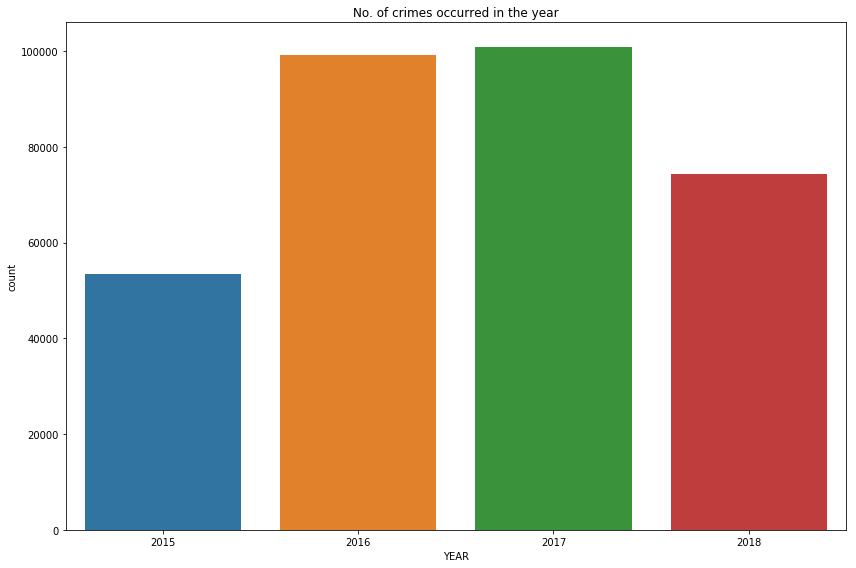

In [3]:
#year-wise crime
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
sns.countplot(x="YEAR", data=data)
ax.set_title("No. of crimes occurred in the year")
plt.tight_layout()
plt.show()

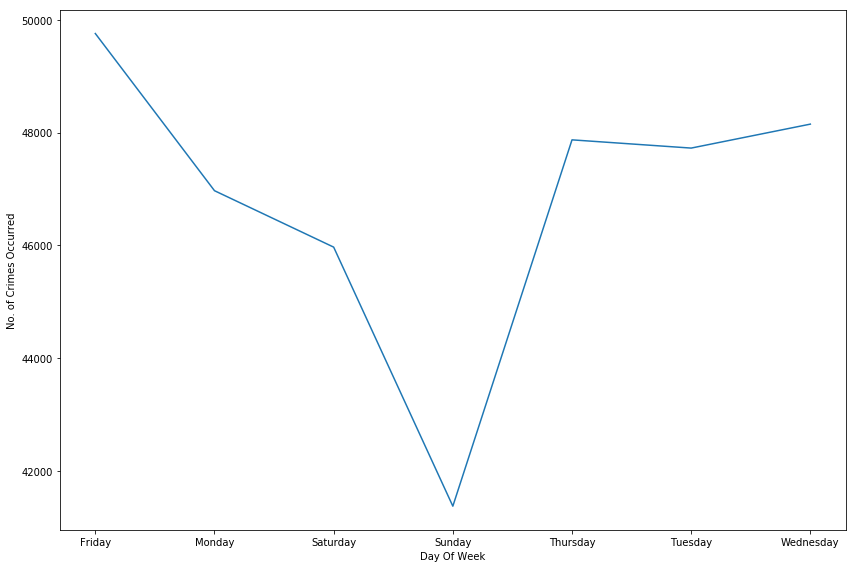

In [4]:
#Most crimes occurred in which day?
#%reset -f
df = data.groupby(["DAY_OF_WEEK"])["OFFENSE_CODE"].count().reset_index()
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p=sns.lineplot(x=df.iloc[:,0], y=df.iloc[:,1], data=df)
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Day Of Week")
plt.tight_layout()
plt.show()

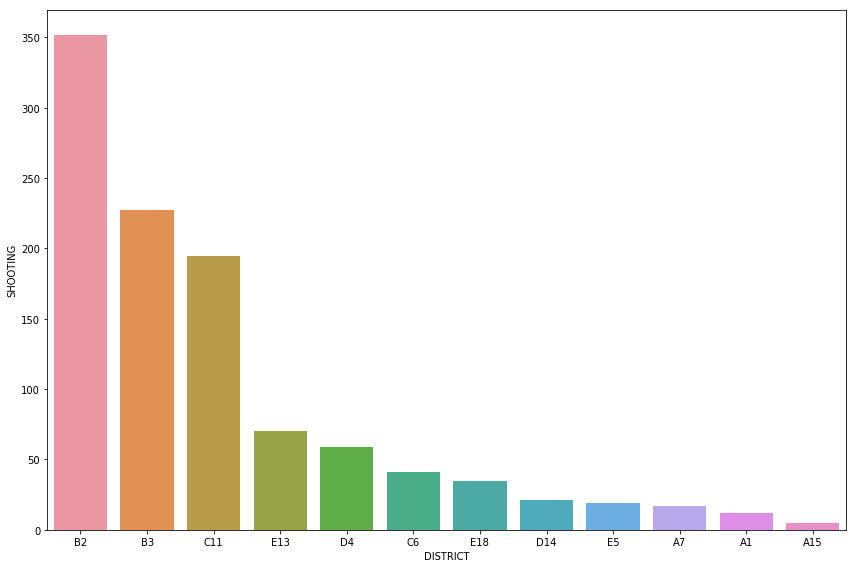

In [5]:
#District-wise shooting occurred
shootingOccurred = data[data["SHOOTING"] == "Y"].groupby("DISTRICT").agg("SHOOTING").count().reset_index().sort_values("SHOOTING", ascending=False)
shootingOccurred
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x=shootingOccurred.DISTRICT, y=shootingOccurred.SHOOTING, data=shootingOccurred)
plt.tight_layout()
plt.show()


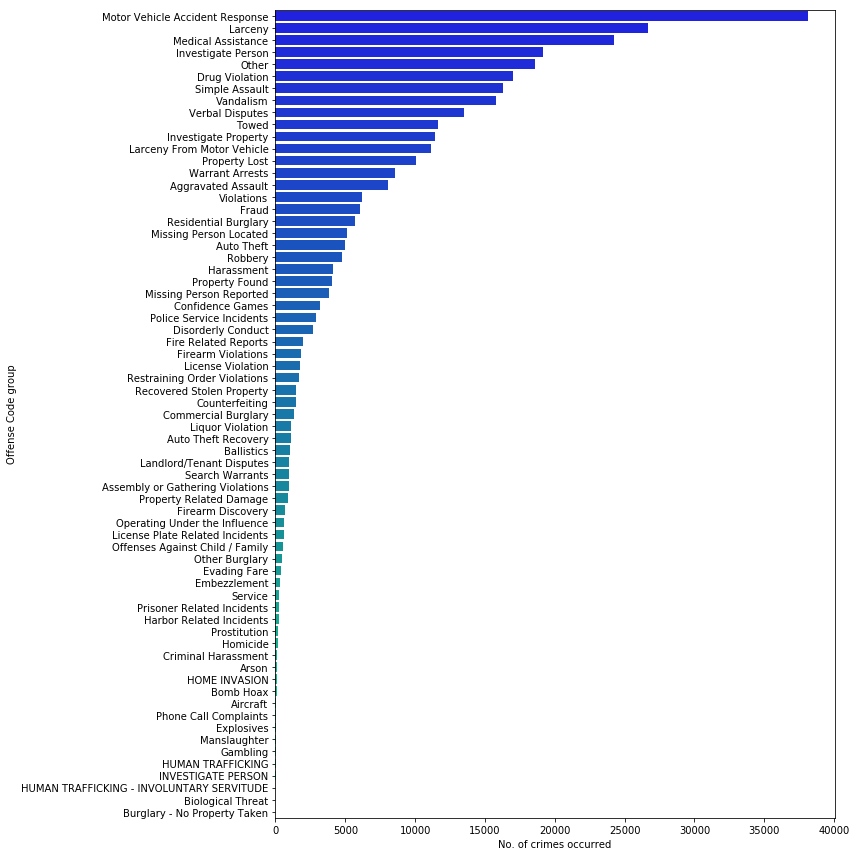

In [6]:
#Based on OFFENSE_CODE_GROUP
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
d = data["OFFENSE_CODE_GROUP"].value_counts().reset_index()
p = sns.barplot(x=d.iloc[:,1], y=d.iloc[:,0], data=d, palette="winter")
p.set_xlabel("No. of crimes occurred")
p.set_ylabel("Offense Code group")
plt.tight_layout()
plt.show()

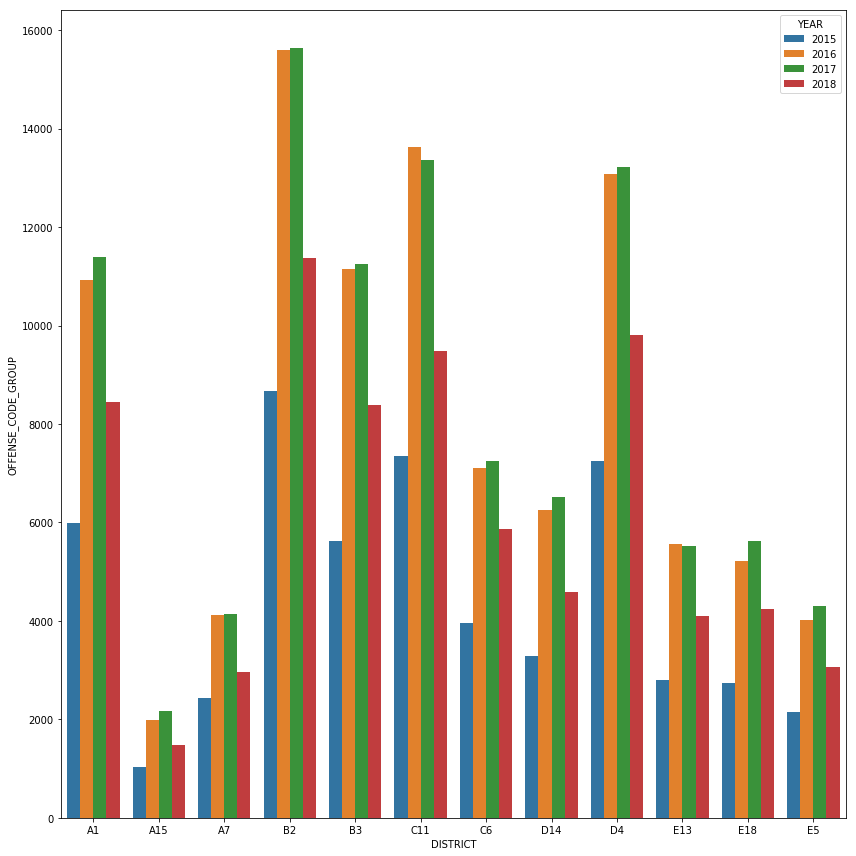

In [7]:
#No.of Offense occurred by district and year
df = data.groupby(["YEAR","DISTRICT"])["OFFENSE_CODE_GROUP"].count().reset_index()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.barplot(x="DISTRICT", y="OFFENSE_CODE_GROUP", hue="YEAR", data=df, ax=ax)
plt.tight_layout()
plt.show()

In [8]:
def get_SeasonName(x):
    y = (x%12+3)//3
    if(y==4):
        return "Spring"
    elif(y==3):
        return "Winter"
    elif(y==2):
        return "Autumn"
    else:
        return "Summer"
    

data["SEASON"] = data["MONTH"].apply(lambda x: get_SeasonName(x))


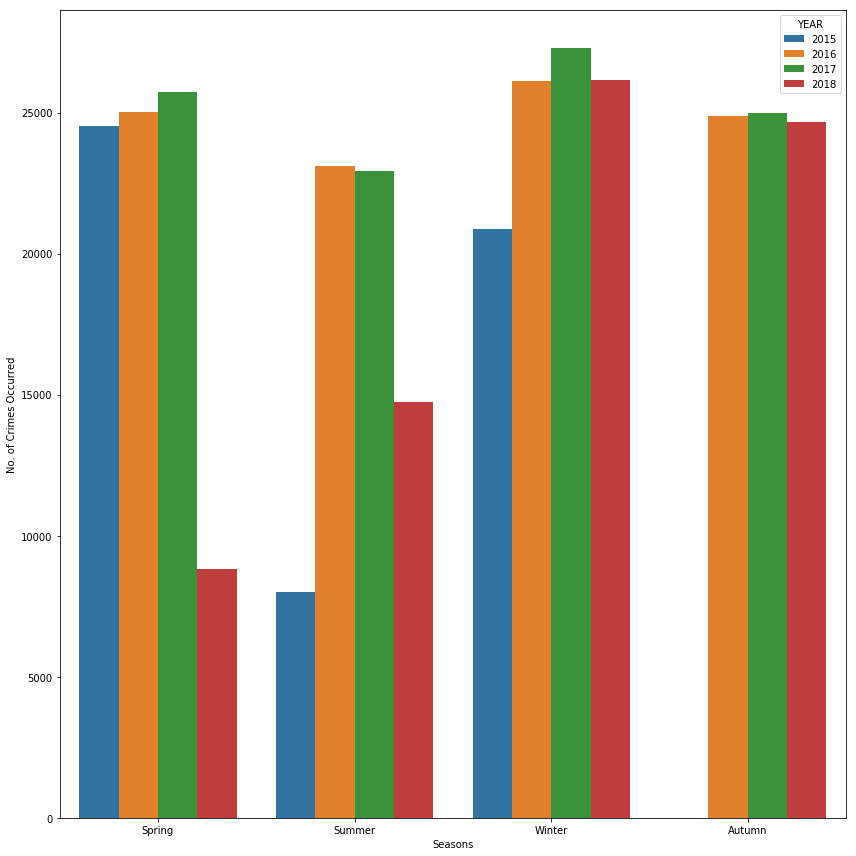

In [9]:
#No. of crimes occurred in each season
df = data.groupby(["YEAR","SEASON"])["OFFENSE_CODE"].count().reset_index()
df
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.barplot(x="SEASON", y="OFFENSE_CODE", hue="YEAR", data=df)#, palette="spring")
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Seasons")
plt.tight_layout()
plt.show()

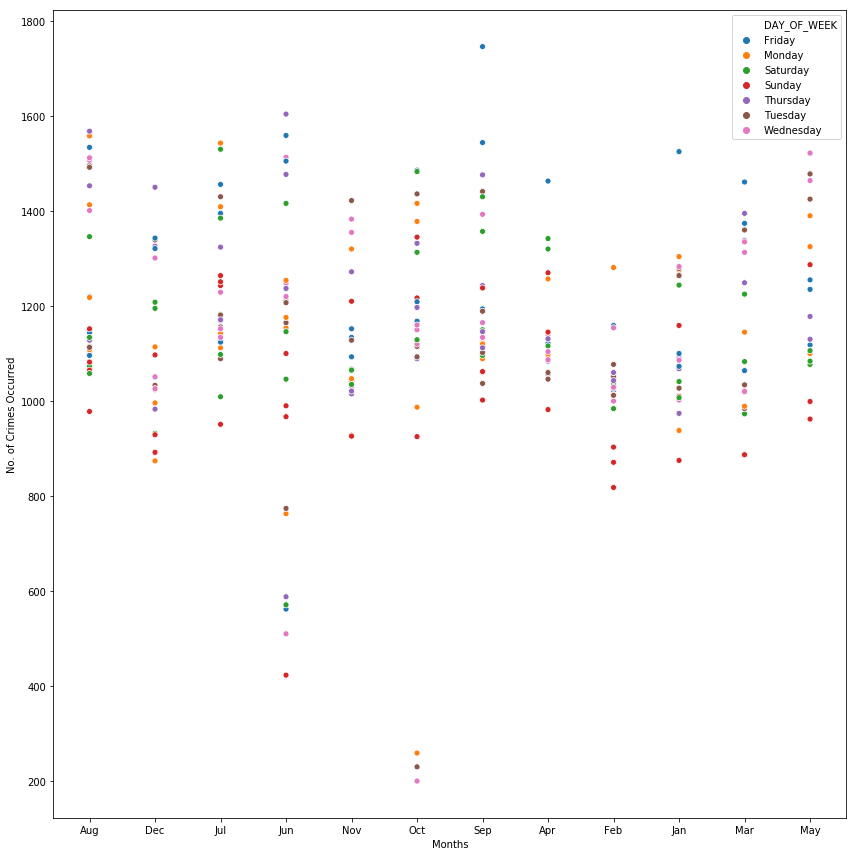

In [10]:
import calendar
data["MONTH_NAME"] = data["MONTH"].apply(lambda x : calendar.month_abbr[x])

df = data.groupby(["YEAR","MONTH_NAME","DAY_OF_WEEK"])["OFFENSE_CODE"].count().reset_index()
df
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="MONTH_NAME", y="OFFENSE_CODE", hue="DAY_OF_WEEK", data=df)
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Months")
plt.tight_layout()
plt.show()

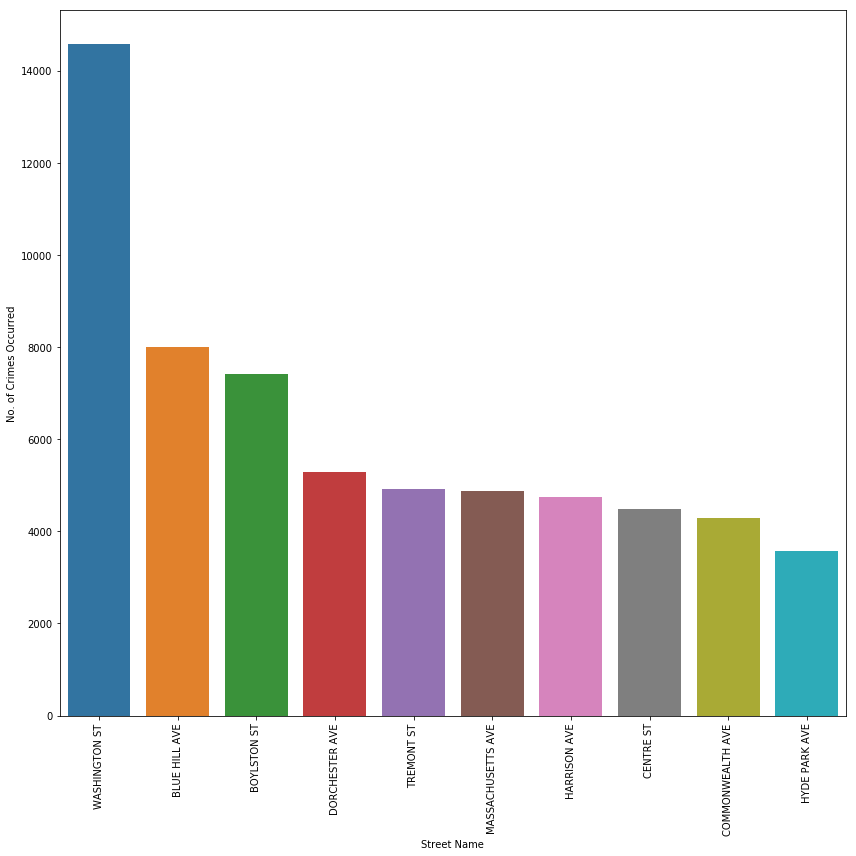

In [11]:
#Top 10 most crime occurred street
df = data["STREET"].value_counts().head(10).reset_index()
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.barplot(x=df.iloc[:,0], y=df["STREET"], data=df)#, palette="spring")
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Street Name")
p.set_xticklabels(p.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.show()


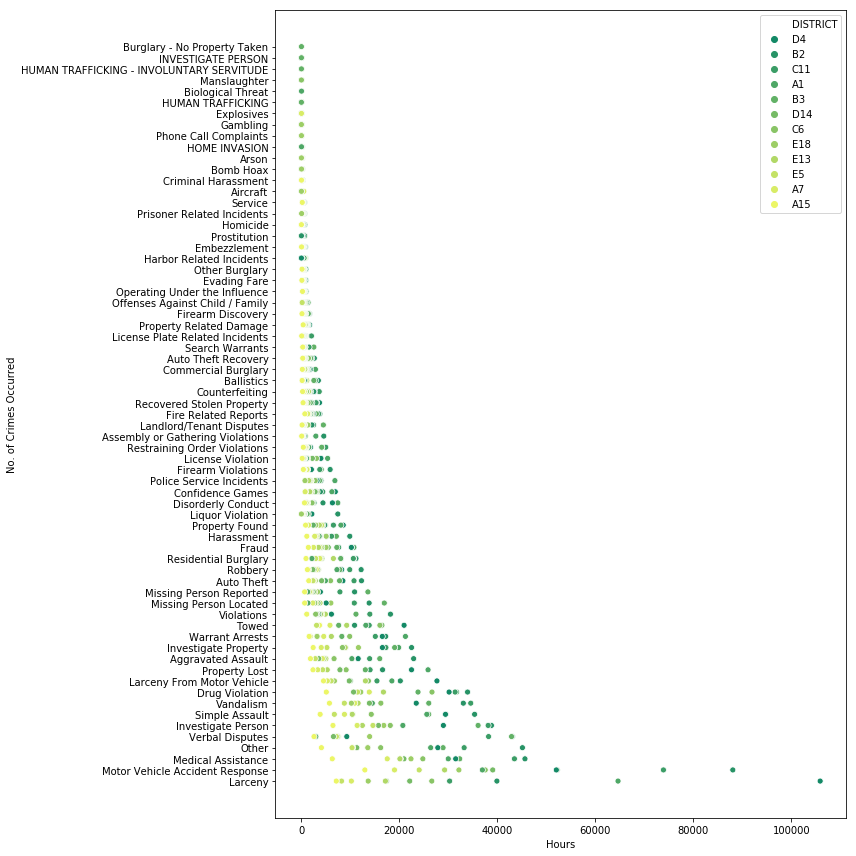

In [12]:
#No. of hours spent on each Offence by district
df = data.groupby(["DISTRICT", "OFFENSE_CODE_GROUP"])["HOUR"].sum().reset_index().sort_values("HOUR", ascending=False)
df
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
p = sns.scatterplot(x="HOUR", y="OFFENSE_CODE_GROUP", hue="DISTRICT", data=df, palette="summer")
p.set_ylabel("No. of Crimes Occurred")
p.set_xlabel("Hours")
plt.tight_layout()
plt.show()
